## More Aspects of Feature Engineering

in any dataset, numerical features are easy to input into models, because you can easily do math with them.
But how do we deal with categorical features, like 'Item_Type' in our dataset?
This column has values like 'Dairy', 'Fruits and Vegetables', 'Meat', etc.
Humans can understand what these values mean, but a machine can't process them as they are.
To convert this kind of feature to 'machine readable' format, we use a technique called 'One Hot Encoding'.
Basically, we take each unique value in the column, and create a new 'dummy' column JUST for that value.
So if our 'Item_Type' column has 5 unique values (not the actual number), then we would get 5 dummy columns.
In each dummy column, you only have 2 possible values: 0 or 1.
1 if the value of Item_Type matches the dummy column's value in that row,
0 if it doesn't.

This way, the model doesn't see text, it only sees more columns of 0's and 1's, which it can easily process.

In [52]:
import pandas as pd

df = pd.read_csv('../data/Train.csv')

In [57]:
# Conveniently, pandas has a function 'get_dummies' to create dummy columns for any feature column we want.
# Let's say we want to create dummy columns for Item_Type.
# First, see how many unique values this column has:
df['Item_Type'].unique().shape

(16,)

In [58]:
# So, since the Item_Type column has 16 unique values, we expect to see 16 dummy columns created.
pd.get_dummies(df, columns=['Item_Type'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
5,FDP36,10.395,Regular,0.000000,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,0
6,FDO10,13.650,Regular,0.012741,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
7,FDP10,NaN,Low Fat,0.127470,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,...,0,0,0,0,0,0,0,1,0,0
8,FDH17,16.200,Regular,0.016687,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
9,FDU28,19.200,Regular,0.094450,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0


## Introduction to Data Modeling

So far, we've been creating hypotheses, exploring the data, cleaning the data, etc., etc... But what about the most important part?

The whole point of data analysis is to actually see if there is a relationship between the input and output data, and if so, how strong that relationship is.

The heart of data analysis is the ability to determine which of the many, many independent variables have the strongest impact on the output variables. If you can figure this out with 100% accuracy (not likely), then you can always predict the values of the output variables with perfect accuracy.

There are many cutting-edge methods used for this purpose, but we will use the most fundamental one, which also happens to be the easiest to learn: regression. Specifically, we'll start with the easiest version of regression: *linear* regression.

The idea behind linear regression is simple: you have a list of data points, each containing 2 values: x and y. Here, x represents our input variable, and y is the output. The goal is to find the equation of a line that gets as close as possbile to most of the (x,y) data points.

Let's see it in action.

In [3]:
import numpy as np
# we won't go into the details of matplotlib,
# just use it a bit for plotting our data points
import matplotlib.pyplot as plt

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

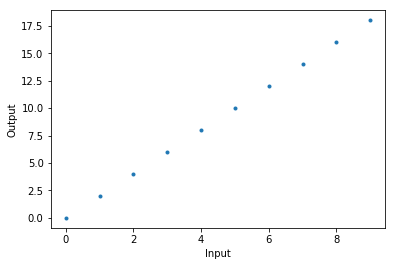

In [20]:
# First, we will create our data points.
# In this case, the x and y points will be generated from a linear equation,
# So they already have a perfect correlation.
x = np.arange(10)
y = 2 * x

# let's plot these points on the graph and see what we get
plt.plot(x,y,'.')
plt.xlabel("Input")
plt.ylabel("Output")
plt

In [17]:
# as you can see, the points form a nice line.
# To do linear regression on these points,
# we will use the numpy.polyfit method
coefs = np.polyfit(x, y, 1)
coefs

array([2.00000000e+00, 1.12346671e-15])

In [18]:
# the array it returned contains the coefficients to create our equation, a and b
# the linear equation will be y = ax + b
def f(x):
    return coefs[0] * x + coefs[1]

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

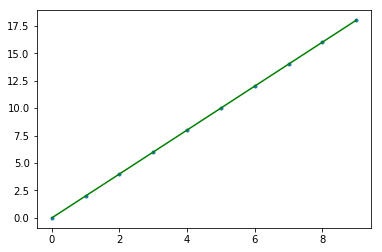

In [21]:
# plot the original points, along with the new line of best fit
plt.plot(x, y, '.', x, f(x), 'g-')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

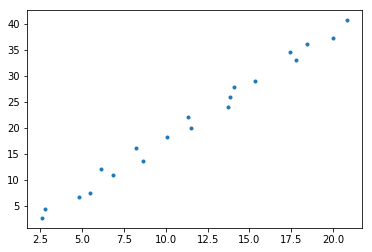

In [27]:
# Of course, the example above is kind of boring,
# because the points were already in a perfect line.
# now, let's create some data that actually looks a bit scattered,
# but still follows a linear pattern

# here's how we will do it:
# first, just like before, create some perfectly linear data
# NOTE: we use linspace here instead of arange to get float type data
x = np.linspace(1, 20, 20)
y = 2 * x
# now, we will use np.random to add some 'error' to each datapoint
x2 = x + np.random.random(x.shape) * 2 # for x-values, add a random error from 0 to 2
y2 = y + np.random.random(y.shape) * 2 - 1 # for y-values, add a random error in range -1 to 1

# now let's plot it and see what we've got:
plt.plot(x2, y2, '.')
plt

In [28]:
# now compute the linear regression
coefs = np.polyfit(x2, y2, 1)
coefs

array([ 2.03578263, -2.25693717])

In [29]:
# we expect to see coef values of a = approx. 2, and b = approx. 0
# since we introduced the random error, the coefficients are of course slightly off
# let's plot the line created by these coefs
def f2(x):
    return coefs[0] * x + coefs[1]

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

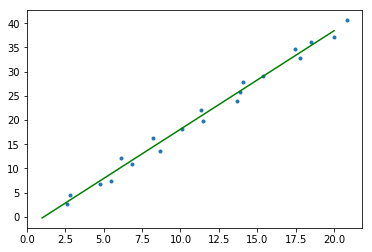

In [30]:
# plot the original points, along with the line of best fit
plt.plot(x2, y2, '.', x, f2(x), 'g-')
plt

In [34]:
# it looks like a pretty good regression, but how do we objectively know HOW good it is?

# The easiest option is to look at the 'residuals'
# a residual is the difference between the actual y-value and the value calculated by the regression
res = y2 - f2(x2)
res

array([-0.30195694,  1.11967784, -0.64653289, -1.40875934, -0.80217525,
        1.8710075 , -1.74499127,  1.72500919, -0.02473269, -1.2409084 ,
        1.37623938, -1.71097279, -0.06926164,  1.42277407, -0.01509731,
       -0.99457768,  1.36682131,  0.79250202, -1.22857116,  0.51450604])

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

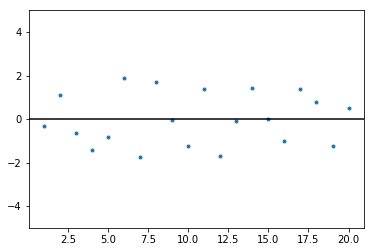

In [39]:
# looking at a plot of the residuals can give good insights into if the regression is a good fit or not.
plt.plot(x, res, '.')
plt.axhline(y=0, color='k')
plt.ylim(-5,5)
plt

In [40]:
# as you can see, the residuals seem to be randomly scattered around near the zero line, which is a good sign.
# If you see any patterns in the residual plot, it's a good sign that you didn't use the correct type of regression.

In [41]:
# The residuals are great and all, but we want just a single number to indicate the success of our model.
# The most common such number to use is the mean squared error (MSE)
# As the name implies, it's the mean of the squared errors between the expected aand actual values (aka the residuals)
# Let's compute the mse of our regression:
mse = np.mean(res**2)
mse

1.378152854223146

In [42]:
# Since it's a mean of squared values, the mse is always positive.
# The closer it is to 0, the better the model is at predicting the output values.

# however, sometimes the mse is not the easiest metric to use to see how your model is performing,
# because there is no upper limit, and the value scales with the scale of the data.
# an mse of 1000 could be extremely bad when the output values are all in the 10s range,
# or it could be ridicuously good if the output values are measured in the millions.

# A more normalized metric for assessing your model is the 'coefficient of determination',
# often simply referred to as r^2 (r squared)
# This is a value in the range 0 to 1: 0 means your model is useless, 1 means your model is perfect.
# Computing r^2 is just a few steps different from computing the MSE.
# The formula is:
# r_squared = 1 - (ss_res / ss_tot)
# where ss_tot is the sum of squares of the difference between each value and the mean,
# and ss_res is the sum of squares of residuals.

# Let's calculate the r^2 value for our regression:
ss_tot = np.sum((y2 - np.mean(y2))**2)
ss_res = np.sum(res**2)
r_2 = 1 - ss_res / ss_tot
r_2

0.9894166203542911

In [43]:
# as we can see, our coefficient of determination for this regression is extremely high (> 0.9)
# But of course, that's because this data was created simply by applying a bit of random error to a perfectly linear equation.
# With real datasets, you would be happy seeing r_squared values around 0.5 or 0.6

# Speaking of real data sets, let's put what we've learned to use, and try to do a regression on our Bigmart sales data.

In [47]:
# We want to find if there's any correlation between the age of a store and the sales.
# first, create the outlet age column
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Age']

0       14
1        4
2       14
3       15
4       26
5        4
6       26
7       28
8       11
9        6
10      14
11      16
12      14
13      16
14      26
15      16
16       4
17      14
18      28
19       9
20      26
21      28
22       9
23      28
24      16
25       6
26       9
27      26
28      15
29      28
        ..
8493     6
8494     6
8495     9
8496     6
8497     9
8498     4
8499     9
8500     6
8501     6
8502    11
8503     9
8504    28
8505     4
8506     4
8507     9
8508    11
8509    15
8510     9
8511     4
8512    26
8513     9
8514    11
8515     4
8516     4
8517    16
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Age, Length: 8523, dtype: int64

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

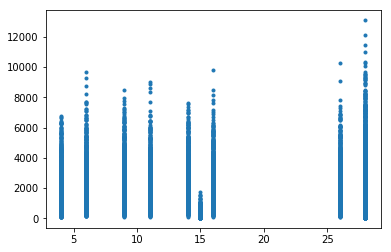

In [48]:
# use the Series.values method to get a numpy array of the outlet ages and outlet sales
ages = df['Outlet_Age'].values
sales = df['Item_Outlet_Sales'].values
# Let's plot em
plt.plot(ages, sales, '.')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\zia18\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

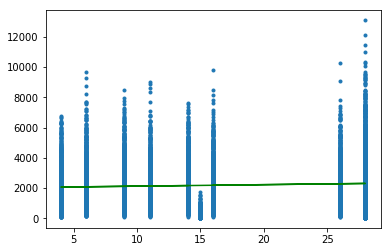

In [49]:
# From this plot, you can already see that there isn't really a good linear relationship between age and sales,
# but that's not stopping us from trying to do a regression anyway.
coefs = np.polyfit(ages, sales, 1)

def age_to_sales(age):
    return coefs[0] * age + coefs[1]

# use our linear regression to compute predicted sales based on age
predicted_sales = age_to_sales(ages)

# let's see the plot
plt.plot(ages, sales, '.', ages, predicted_sales, 'g-')
plt

In [50]:
# oh yeah, that definitely looks like a useful model (not)
# regardless of how bad it is, we can still perform our MSE and r-squared tests:
mse = np.mean((predicted_sales - sales)**2)
ss_tot = np.sum((sales - np.mean(sales))**2)
ss_res = np.sum((predicted_sales - sales)**2)
r_squared = 1 - ss_res / ss_tot

print(mse, r_squared)

2904769.4604974343 0.0024142453202204983


In [51]:
# As we expected, the MSE is extremely high compared to the data (the highest sale value is above 12,000),
# while the mse is a whopping 2.9 MILLION
# Meanwhile, the r_squared is extremely close to 0, telling us that the store age does not seem to have
# much impact at all on the sales.
# Ultimately, this is still good data, because it tells us which features are NOT very impactful on the final output,
# which is just as good as knowing the high impact features.